check 90.0
(False, (0, 0))
check 45.0
(False, (0, 0))
check 22.5
(False, (0, 0))
check 11.25
(False, (0, 0))
check 5.625
(False, (0, 0))
check 2.8125
(False, (0, 0))
check 1.40625
(False, (0, 0))
check 0.703125
(False, (0, 0))
check 0.3515625
(True, (-44.99999966472387, 1.6763806343078613e-07))
check 0.52734375
(True, (-44.99999966472387, 1.6763806343078613e-07))
check 0.615234375
(True, (-44.99999966472387, 1.6763806343078613e-07))
check 0.6591796875
(True, (-44.99999966472387, 1.6763806343078613e-07))
check 0.68115234375
(False, (0, 0))
check 0.670166015625
(False, (0, 0))
check 0.6646728515625
(True, (-38.326216377317905, 23.581797424703836))
check 0.66741943359375
(True, (-37.15938437730074, 25.38070471957326))
check 0.668792724609375
(False, (0, 0))
check 0.6681060791015625
(True, (-36.87778193503618, 25.7881604321301))
check 0.6684494018554688
(False, (0, 0))
check 0.6682777404785156
(False, (0, 0))
check 0.6681919097900391


C:\Users\FeelUs\AppData\Local\Temp\ipykernel_7044\1599890983.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,7))


(True, (-36.84281934052706, 25.8380857296288))
check 0.6682348251342773
(True, (-36.82536084204912, 25.862962547689676))
check 0.6682562828063965
(True, (-36.81663293391466, 25.87538519874215))
check 0.668267011642456
(False, (0, 0))
check 0.6682616472244263
(True, (-36.81445363909006, 25.878485832363367))
check 0.6682643294334412
(False, (0, 0))
check 0.6682629883289337
(True, (-36.81390780955553, 25.87926233187318))
check 0.6682636588811874
(False, (0, 0))
check 0.6682629883289337
(True, (-36.81390780955553, 25.87926233187318))
0.6682629883289337
-36.81390780955553 25.87926233187318


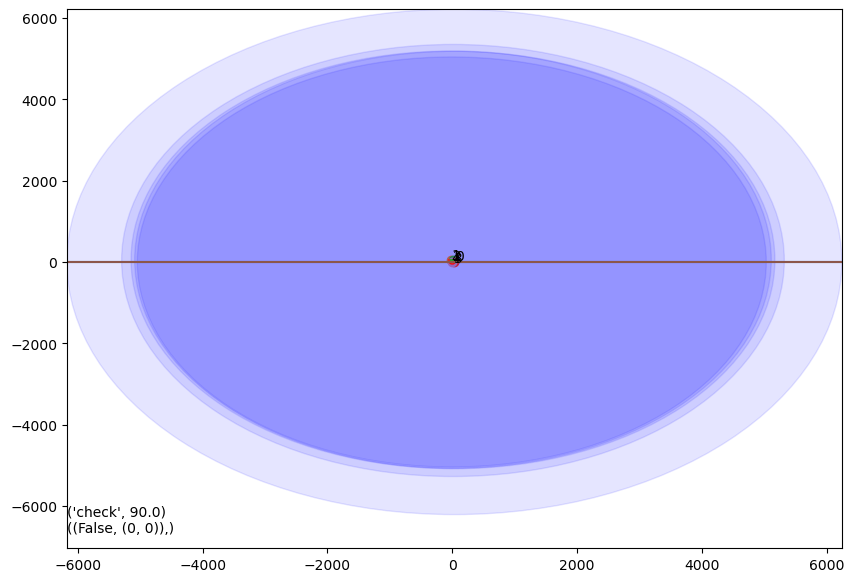

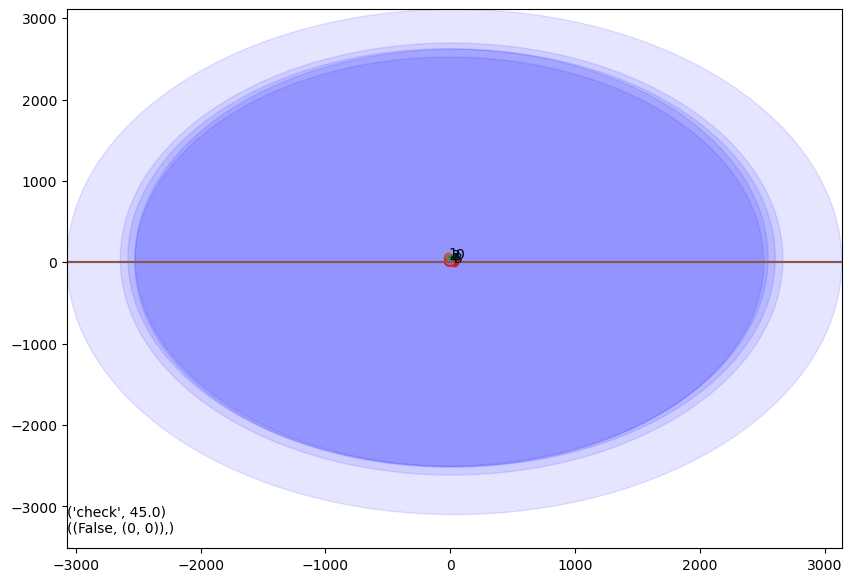

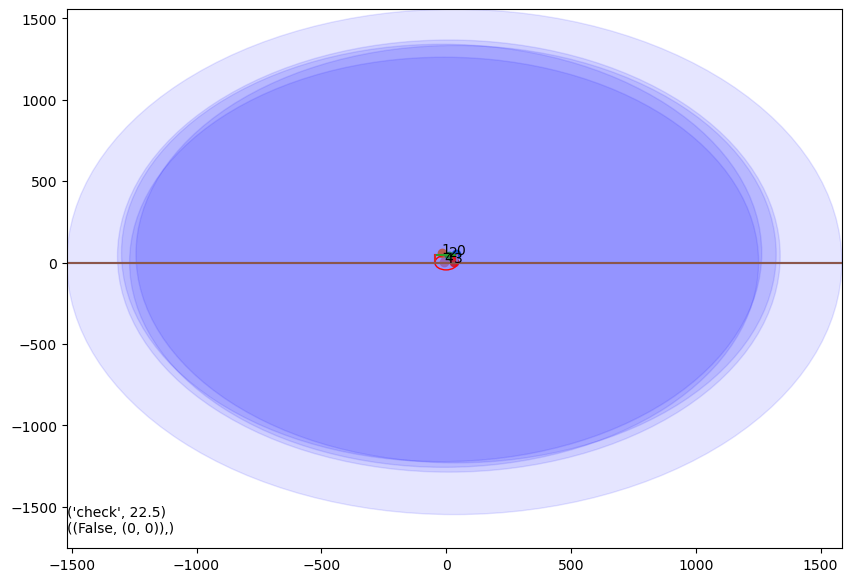

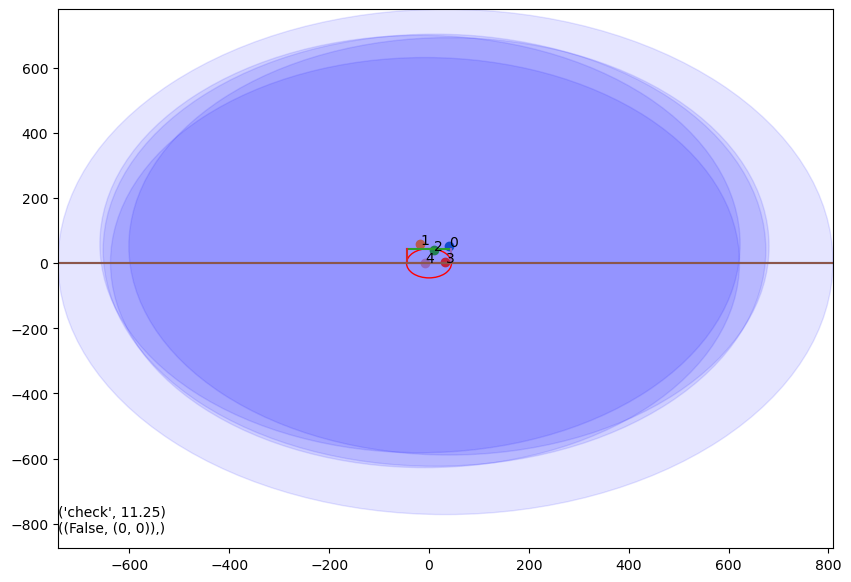

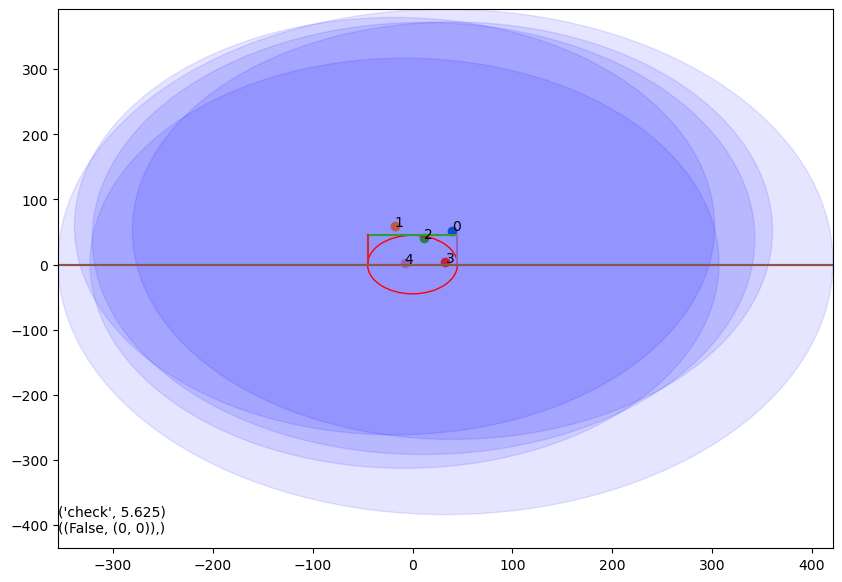

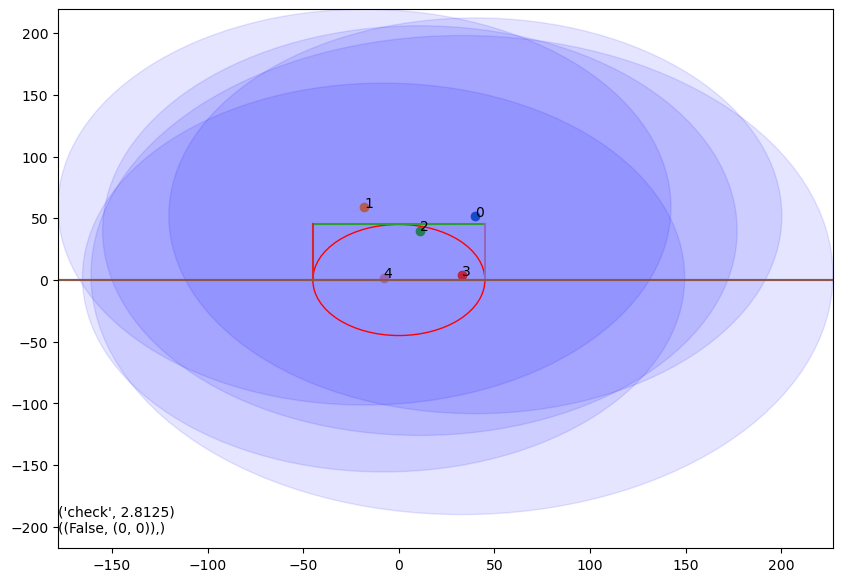

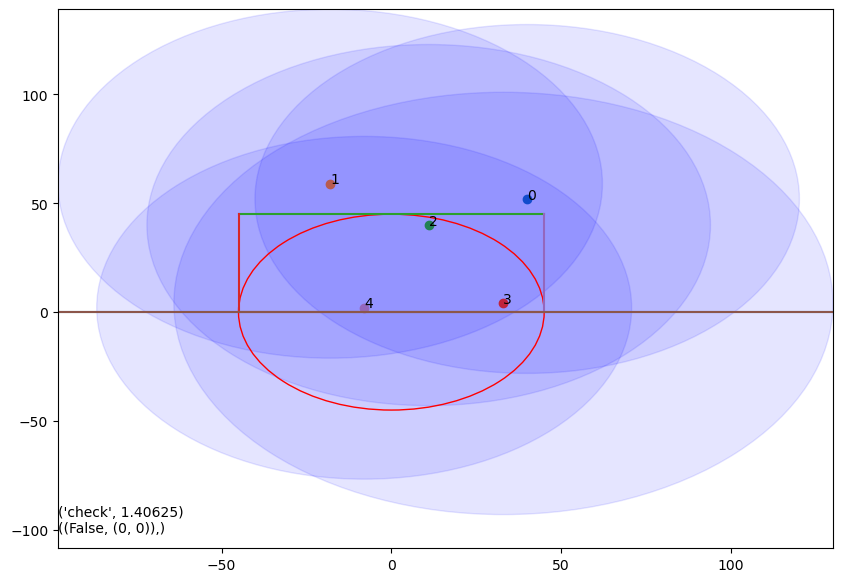

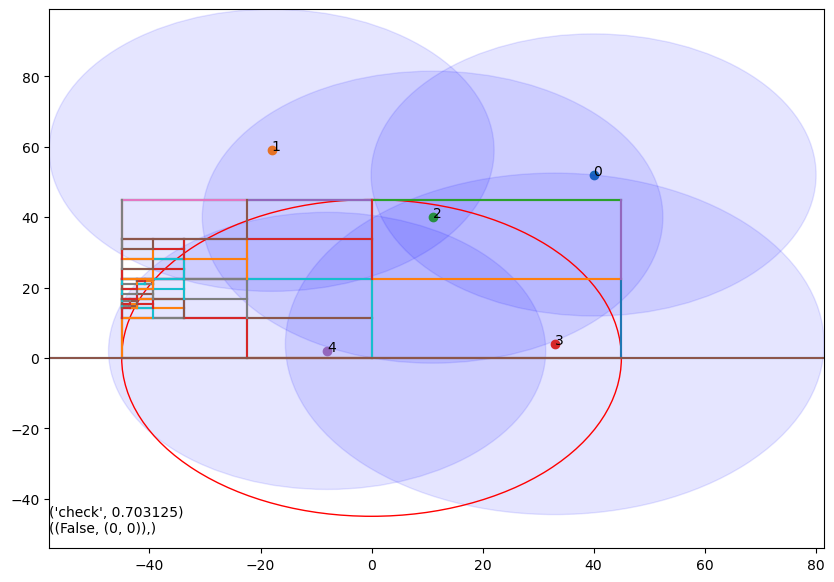

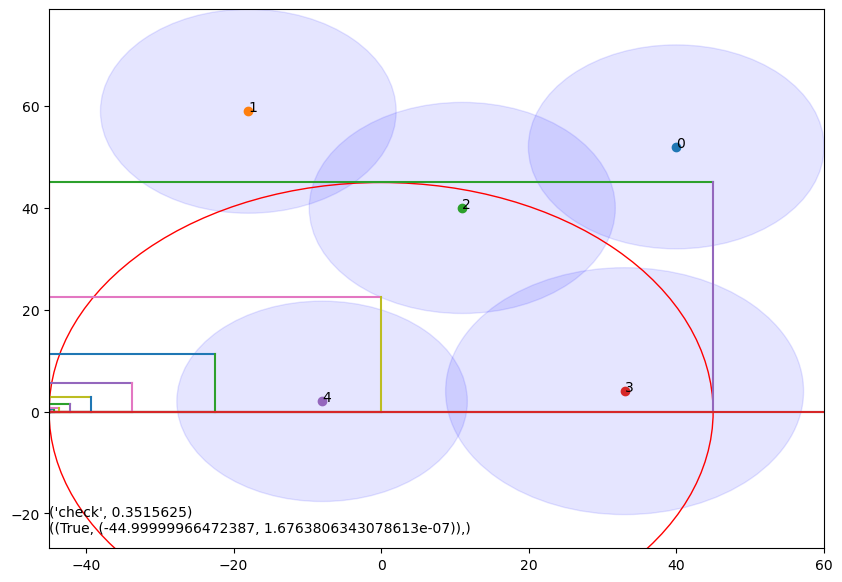

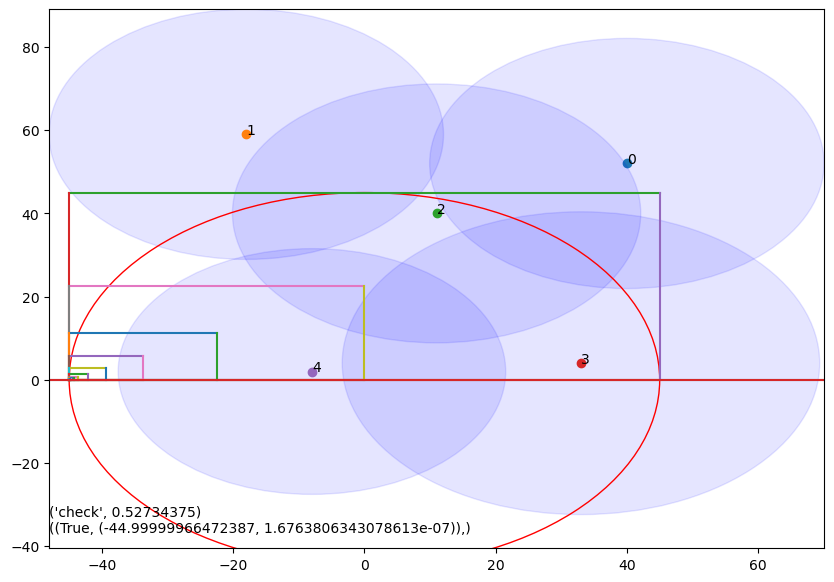

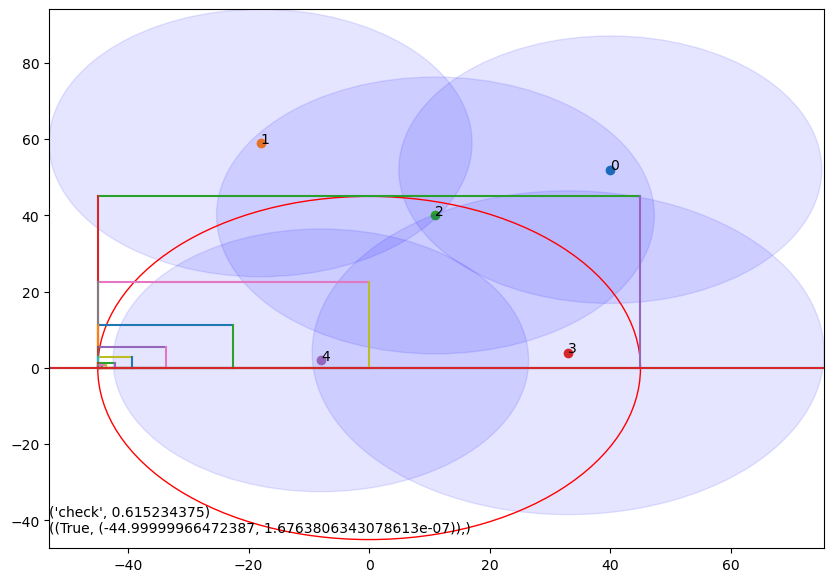

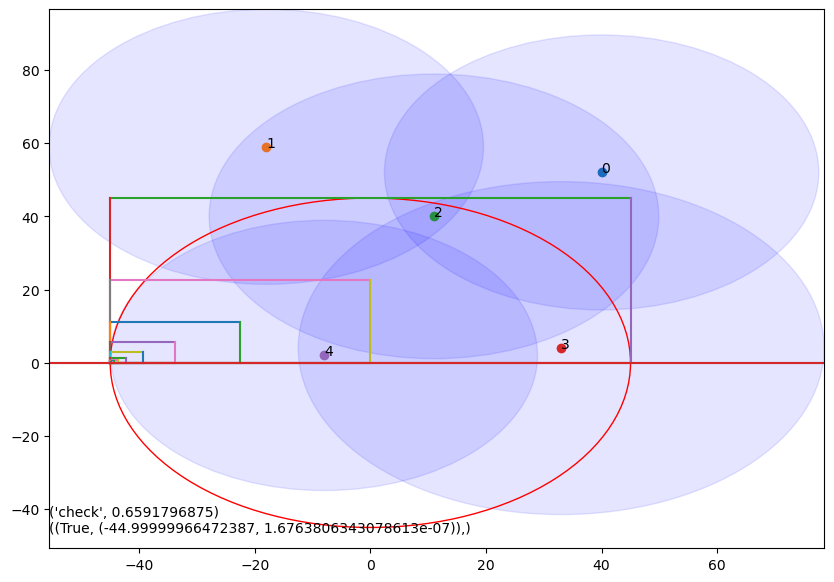

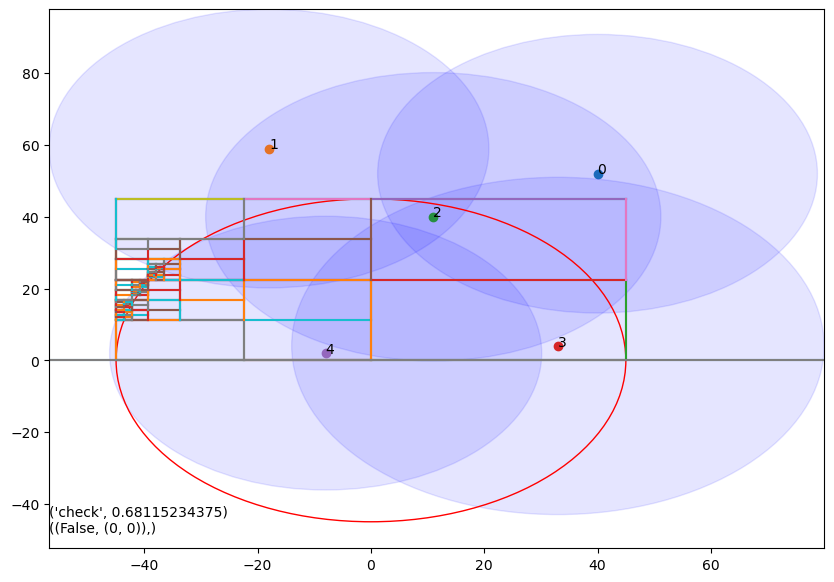

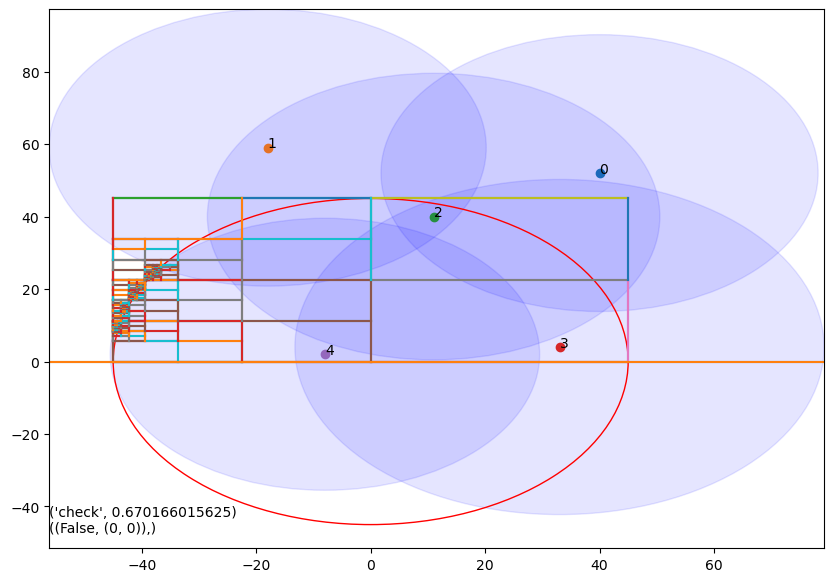

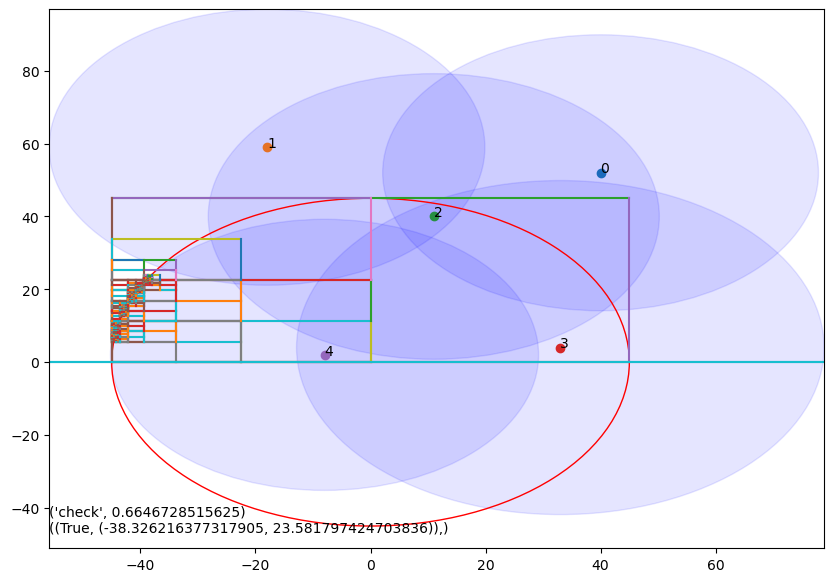

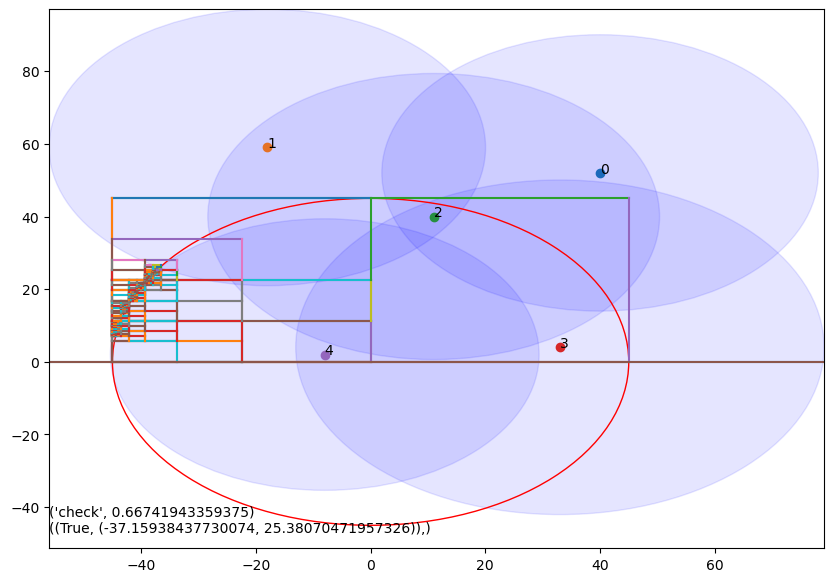

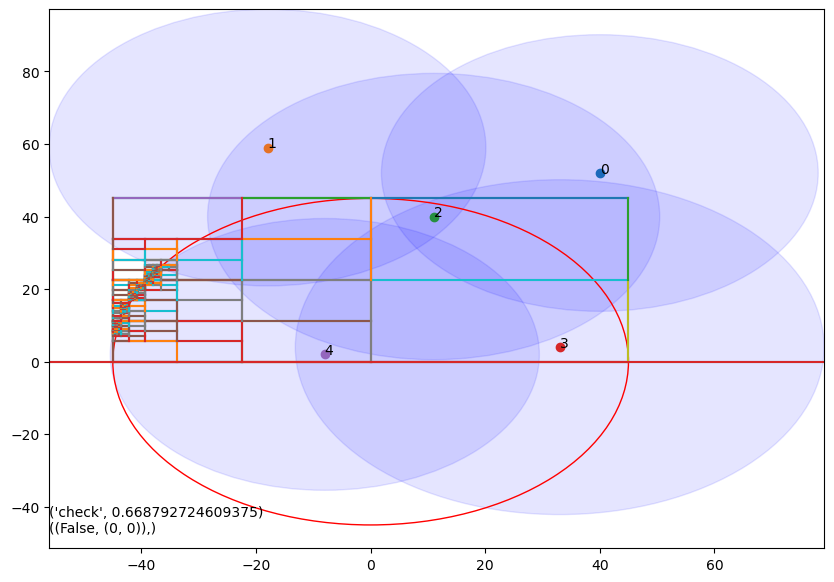

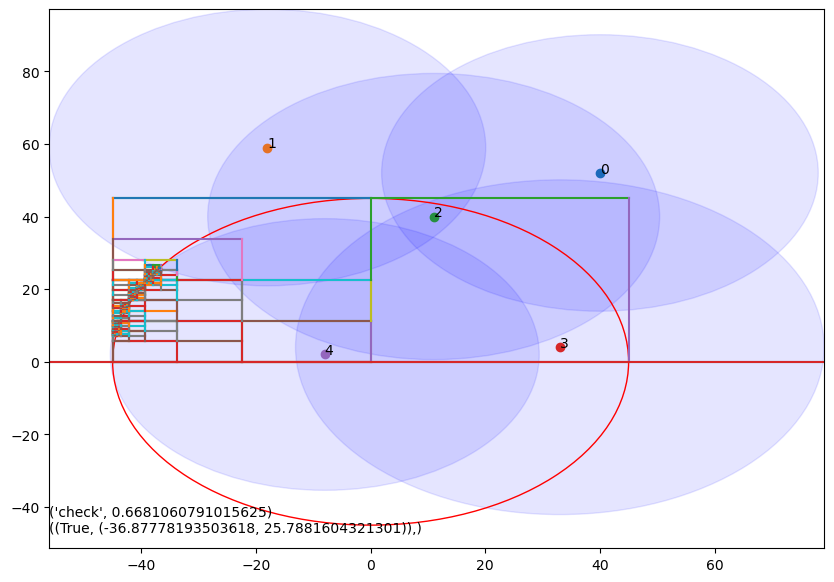

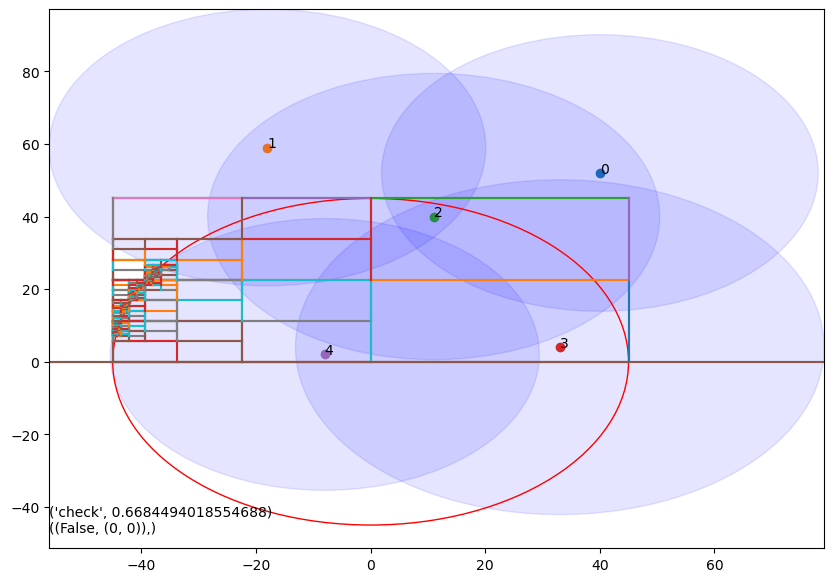

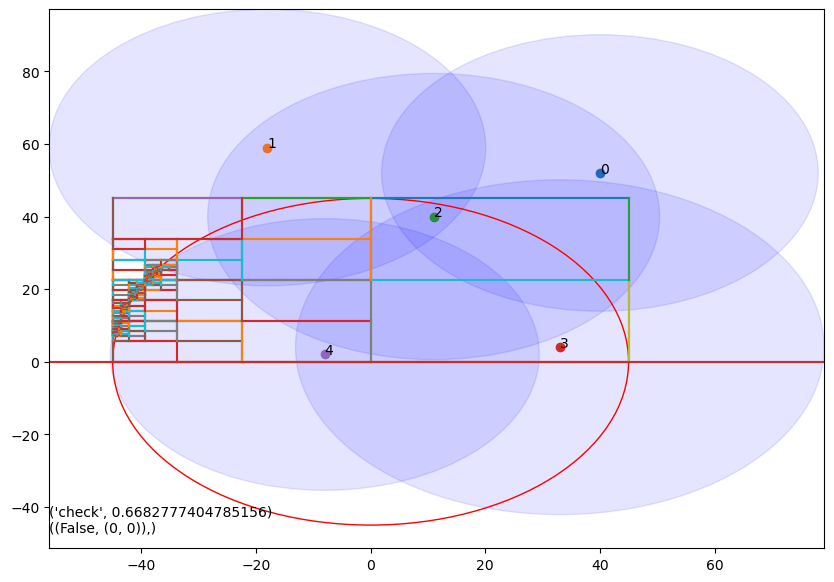

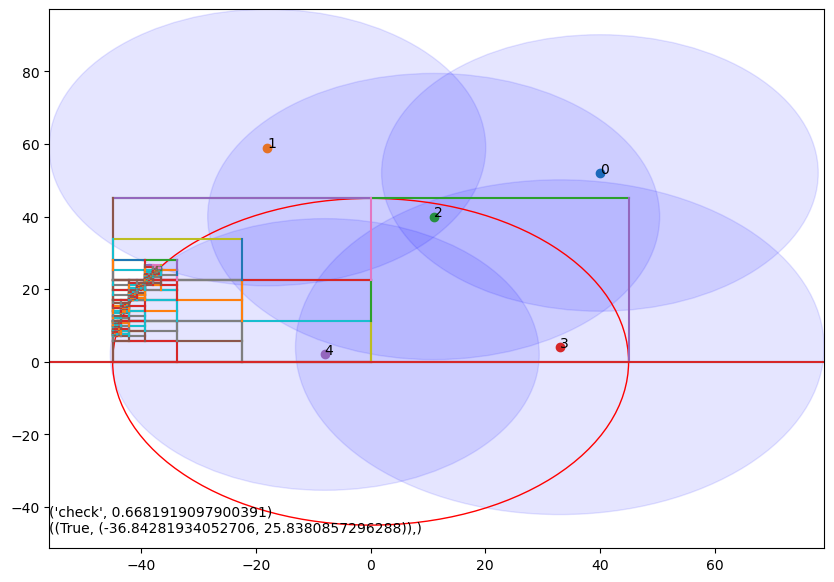

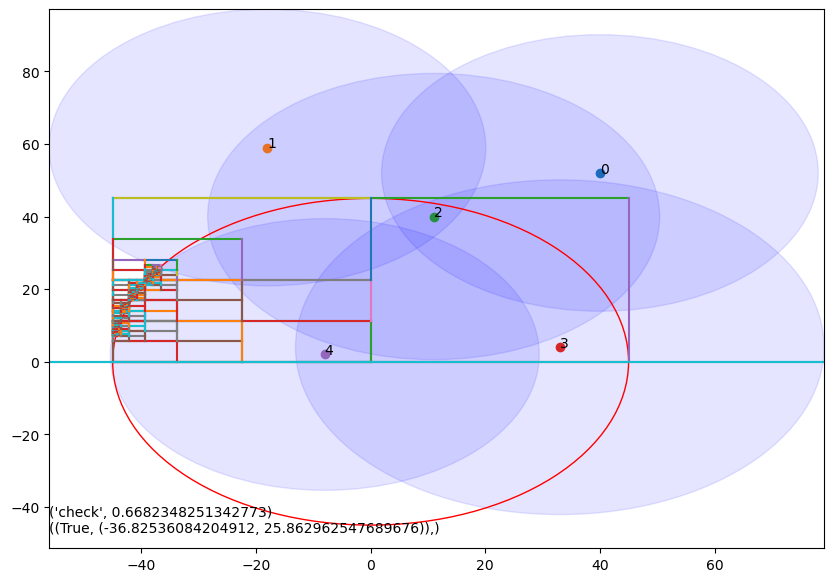

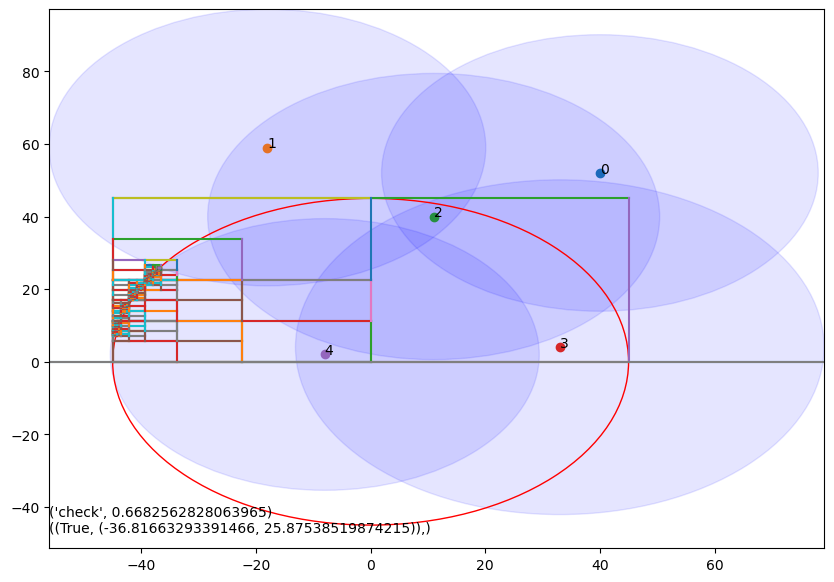

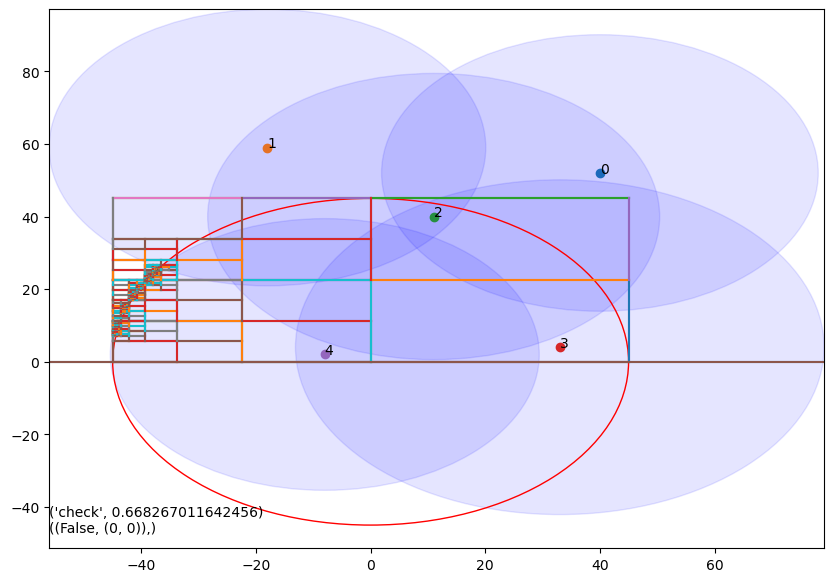

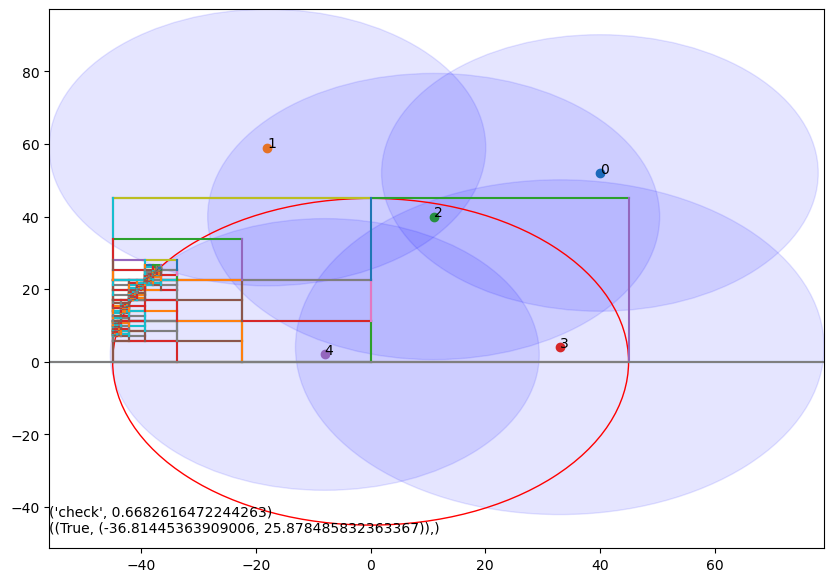

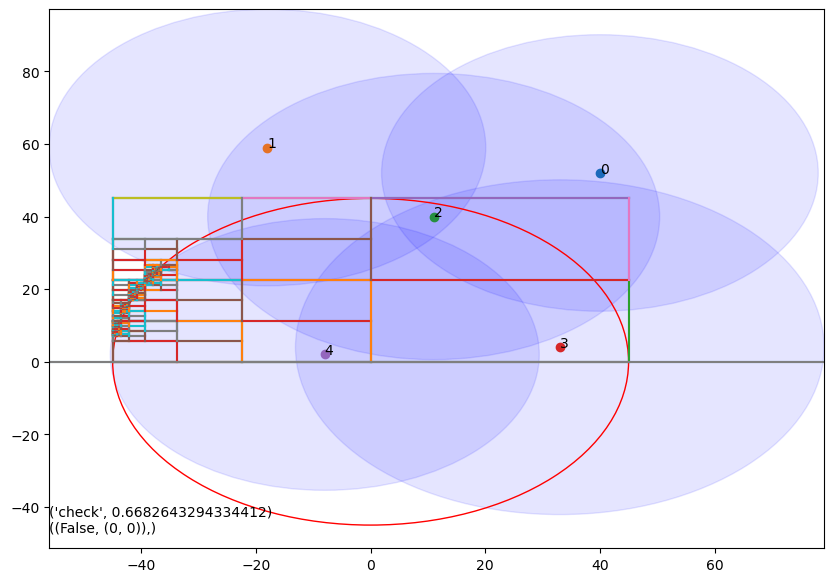

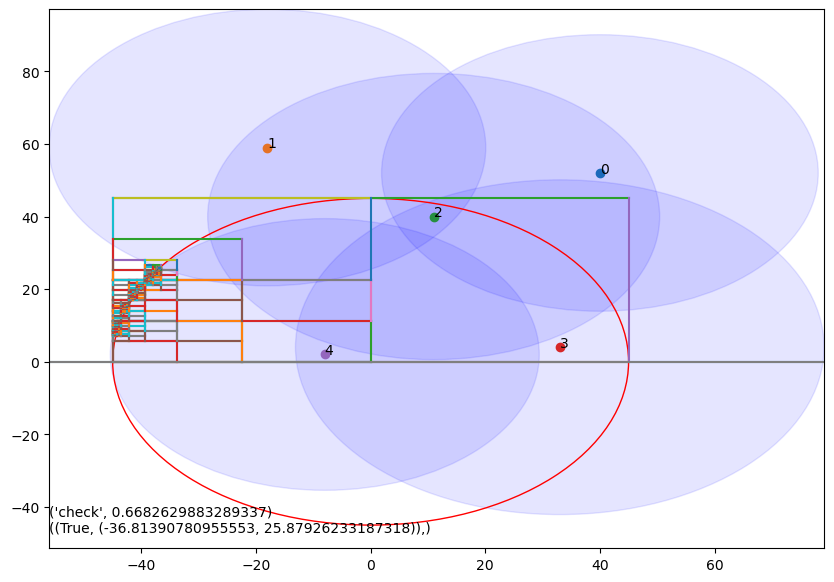

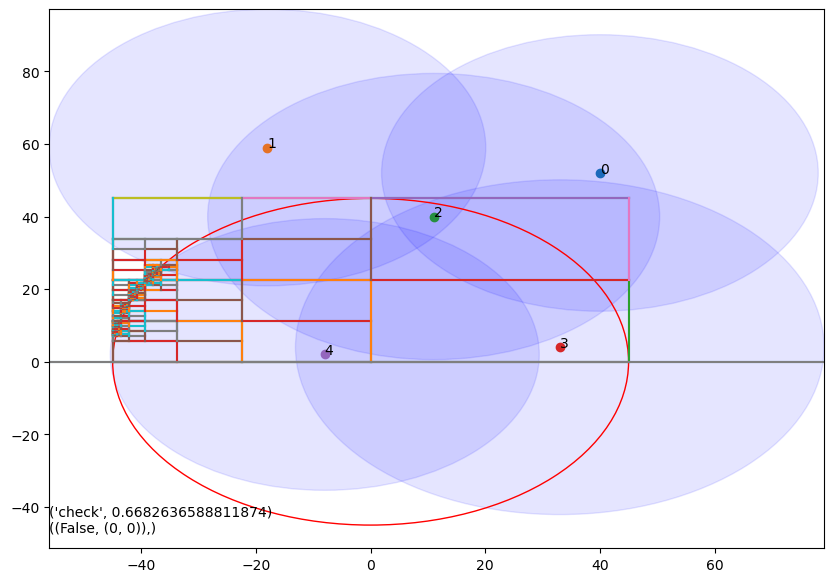

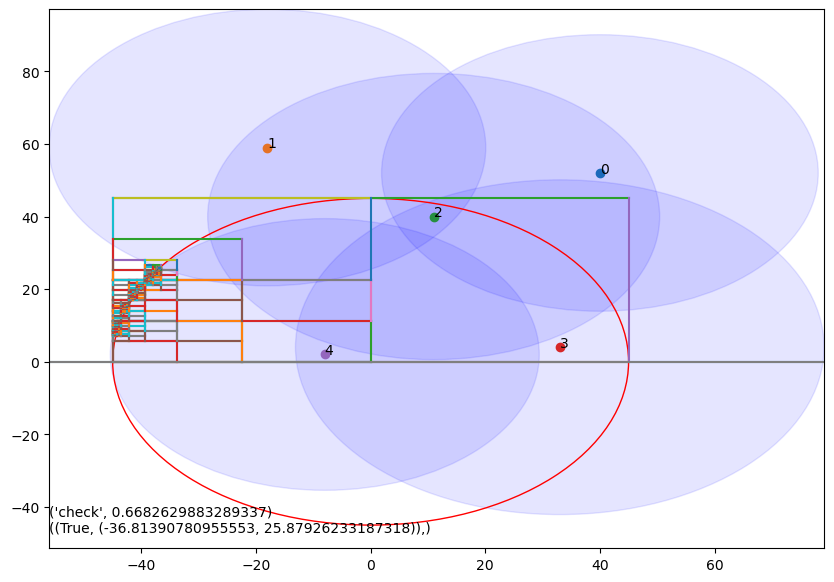

In [20]:
debug = 1
if debug: 
	import matplotlib.pyplot as plt
	from matplotlib.patches import Rectangle

def pointincircle(x0, y0, r0, xp, yp):
	return (xp-x0)**2 + (yp-y0)**2 - r0**2 < 0.000001

def checkrect(xll, yll, xru, yru, time):
	if debug:
		plt.plot([xll,xru],[yll,yll])
		plt.plot([xll,xru],[yru,yru])
		plt.plot([xll,xll],[yll,yru])
		plt.plot([xru,xru],[yll,yru])
	if not pointincircle(0, 0, D, xll, yll) and \
	   not pointincircle(0, 0, D, xll, yru) and \
	   not pointincircle(0, 0, D, xru, yll) and \
	   not pointincircle(0, 0, D, xru, yru):
		return (False,(0,0))
	if xru-xll < 0.000001:
		return (True, ((xll+xru)/2,(yll+yru)/2))
	for i in range(n):
		if pointincircle(X[i], Y[i], V[i]*time, xll, yll) and \
		   pointincircle(X[i], Y[i], V[i]*time, xll, yru) and \
		   pointincircle(X[i], Y[i], V[i]*time, xru, yll) and \
		   pointincircle(X[i], Y[i], V[i]*time, xru, yru):
			return (False,(0,0))
	xs = [xll, (xll+xru)/2, xru]
	ys = [yll, (yll+yru)/2, yru]
	for i in range(2):
		for j in range(2):
			quarter = checkrect(xs[i], ys[j], xs[i+1], ys[j+1], time)
			if quarter[0]:
				return quarter
	return (False, (0,0))

if debug:
	text = ''
	lines = 0
def iprint(*s):
	print(*s)
	if debug:
		global text, lines
		text += str(s)+'\n'
		lines+=1
def check(time):
	if debug:
		plt.figure(figsize=(10,7))
		xmax = D
		xmin = -D
		ymax = D
		ymin = 0
		for ic in range(n):
			(x,y) = X[ic], Y[ic]
			r = V[ic]*time
			xmax = max(xmax,x+r)
			xmin = min(xmin,x-r)
			ymax = max(ymax,y+r)
			ymin = min(ymin,y-r)
			plt.gca ().add_artist ( plt.Circle ((x,y), radius= r , color='blue', alpha= .1) )
			plt.scatter(x,y)
			plt.annotate(str(ic), xy=(x,y))
		plt.gca ().add_artist (plt.Circle ((0,0), radius= D , color='red', fill=False) )
		plt.plot([xmin,xmax],[0,0])

		global text, lines
		text = ''
		lines= 0
		#iprint(xmin,xmax,ymin,ymax)

		iprint('check',time)
	tmp = checkrect(-D,0,D,D,time)
	if debug:
		iprint(tmp)

		ymin-=lines/30*(ymax-ymin)
		plt.axis([xmin,xmax,ymin,ymax])
		plt.plot([xmin,xmax],[0,0])
		plt.annotate(text, xy=(xmin,ymin))

	return tmp

with open("input.txt", "r") as F:
	D, n = map(int,F.readline().split())
	X = []
	Y = []
	V = []
	for i in range(n):
		a,b,c = map(int,F.readline().split())
		X.append(a)
		Y.append(b)
		V.append(c)
l = 0
r = 4*D
while r-l > 0.000001:
	m = (l+r)/2
	if check(m)[0]:
		l = m
	else:
		r = m
now = check(l)
print(l)
print(*now[1])

